In [2]:
import pickle
import matplotlib.pyplot as plt

#default size of the graph
plt.rcParams['figure.figsize'] = (10.0, 8.0) 


%load_ext autoreload
%autoreload 2

import jj_basic_fn as JJ
from hyperparams import Hyperparams as hp
from patient import patient
import prep
from plot_funcs import *
import modules

/Users/hp/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/hp/anaconda/lib/python3.5/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
p231, p222_1, p222_2, p229 = modules.build_patients()
pat_list = [p231, p222_1, p222_2, p229]
for pat in pat_list:
    JJ.save_object(pat, '../patients/' + pat.id +'.p')

/Users/hp/anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/Users/hp/anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/hp/anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

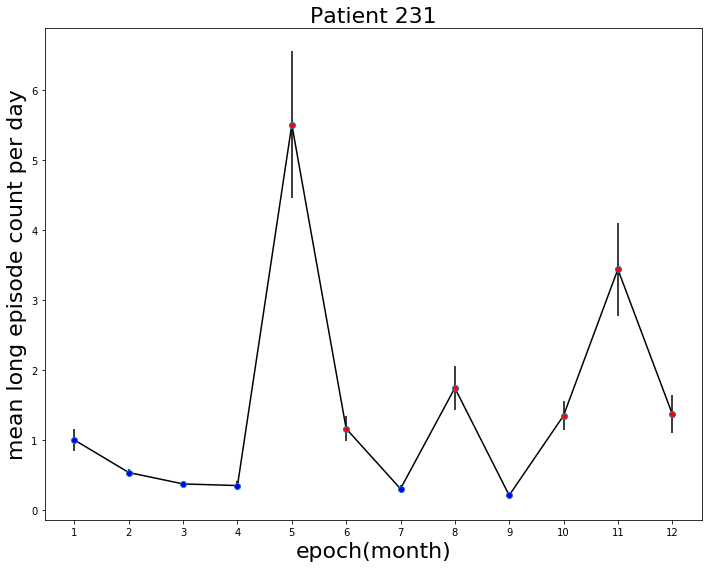

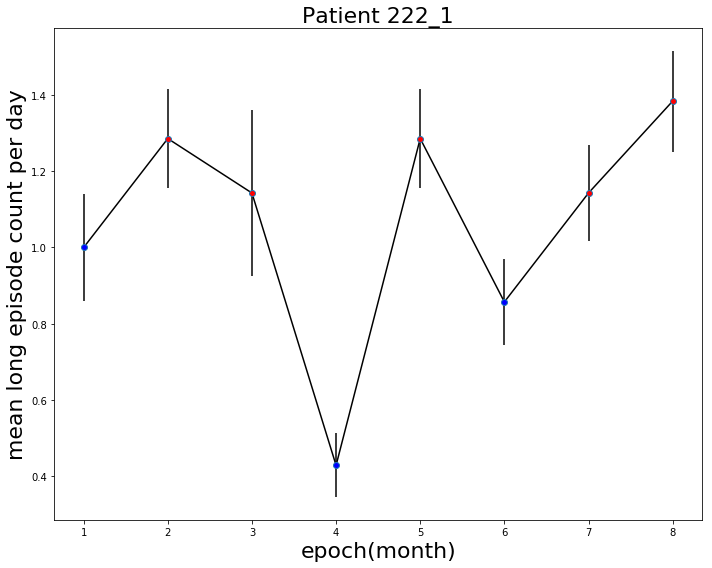

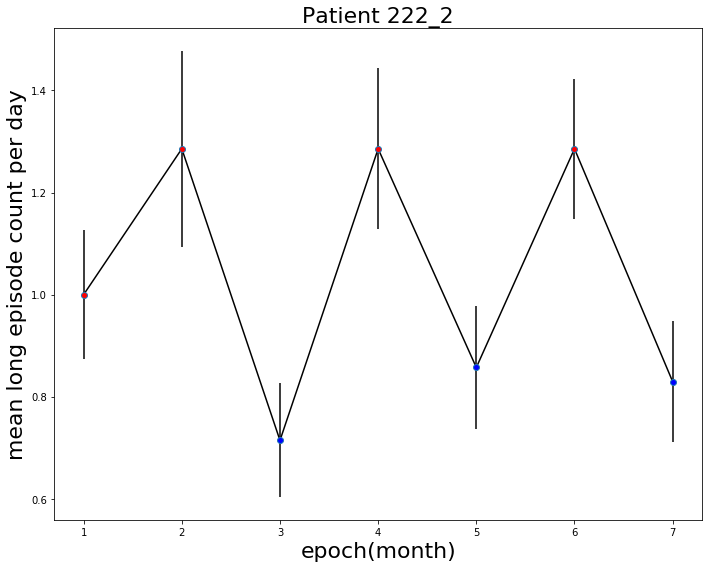

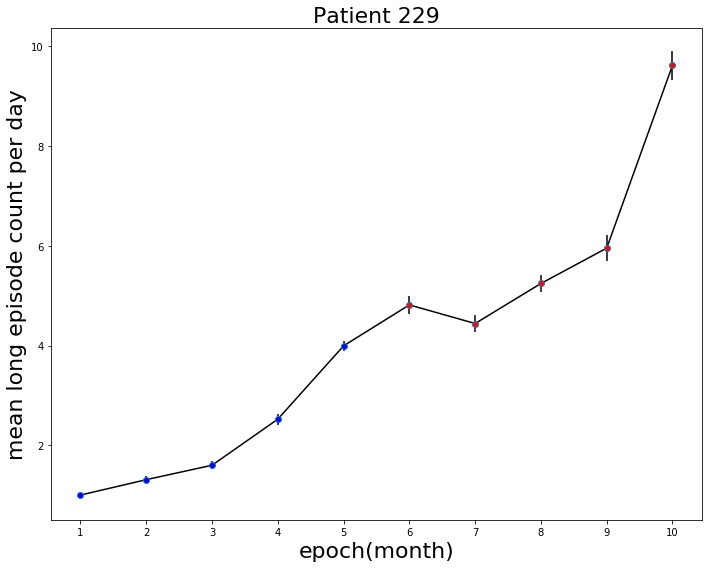

In [4]:
plot_epoch_mean(pat_list)

In [5]:
def report_count(pat_list):
    df_num = pd.DataFrame([], columns = ['patient_id','label', 'number'])
    tf = [True, False]
    i = 0
    for pat in pat_list:
        data = pat.features
        for lab in tf: 
                df_num.loc[i,'patient_id'] = pat.id
                df_num.loc[i,'label'] = lab
                df_num.loc[i,'number'] = np.array(data.loc[data.loc[:,'label'] == lab]).shape[0]
                i += 1
    print(df_num)
    print(pd.DataFrame(df_num.groupby('patient_id').agg('sum').loc[:,'number']))
    #print(pd.DataFrame(df_num.groupby(['patient_id', 'label']).agg('sum').loc[:,'number']))


In [7]:
pat_list_count = [p231, p222_1, p222_2, p229]
report_count(pat_list_count)

  patient_id  label number
0        231   True    537
1        231  False    356
2      222_1   True    276
3      222_1  False    452
4      222_2   True    265
5      222_2  False    359
6        229   True     32
7        229  False     15
            number
patient_id        
222_1          728
222_2          624
229             47
231            893
